<a href="https://colab.research.google.com/github/harshitbhavnani/Deep-Learning/blob/main/DeepLearning_J076_Exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
from __future__ import print_function
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import models
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Activation, Flatten, Conv2D,MaxPooling2D
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.preprocessing.image import ImageDataGenerator
from keras import layers

import keras
from keras.datasets import cifar10
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
random.seed(42)

**Loading Data**

In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (x_test, y_test) = cifar10.load_data()

**Image Preprocessing**

x_train shape: (10000, 32, 32, 3)
10000 train samples
2000 test samples


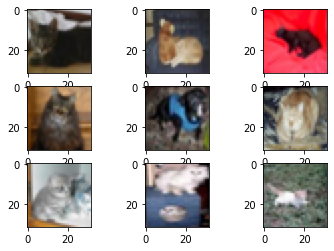

In [ ]:
img_rows, img_cols = 32, 32
num_classes = 2

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

train_picks = np.ravel(np.logical_or(y_train==3,y_train==5))  
test_picks = np.ravel(np.logical_or(y_test==3,y_test==5))
y_train = np.array(y_train[train_picks]==5,dtype=int)
y_test = np.array(y_test[test_picks]==5,dtype=int)
x_train = x_train[train_picks]
x_test = x_test[test_picks]

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(np.ravel(y_train), num_classes)
y_test = keras.utils.to_categorical(np.ravel(y_test), num_classes)

images = range(0,9)
for i in images:
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

plt.show()

In [ ]:
X_train = np.concatenate((X_train,x_test))
Y_train = np.concatenate((y_train, y_test))

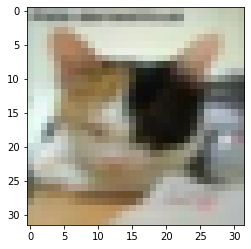

In [ ]:
plt.imshow(x_train[6000], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib

ie_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02123045")
print(ie_page.content)
ie_soup = BeautifulSoup(ie_page.content, 'html.parser')
ae_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02084071")
print(ae_page.content)
ae_soup = BeautifulSoup(ae_page.content, 'html.parser')

ie_str_soup=str(ie_soup)
type(ie_str_soup)
ie_split_urls=ie_str_soup.split('\r\n')
print(len(ie_split_urls))

ae_str_soup=str(ae_soup)
type(ae_str_soup)
ae_split_urls=ae_str_soup.split('\r\n')
print(len(ae_split_urls))

In [ ]:
!mkdir '/content/catdog_dev/' 
!mkdir '/content/catdog_test/'

In [ ]:
!pip3 install imagenetscraper

In [ ]:
import imagenetscraper

#imagenetscraper n02123045 catdog_dev/
#magenetscraper n02084071 catdog_test/

In [ ]:
img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)

def url_to_image(url):
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	return image

In [ ]:
n_of_training_images=50 
counter=0
for progress in range(10*n_of_training_images):
    if (counter == n_of_training_images):
      break
    if (progress%10==0):
        print(progress)
    if not ie_split_urls[progress] == None:
      try:
        I = url_to_image(ie_split_urls[progress])
        if (len(I.shape))==3:
          save_path = '/content/catdog_dev/ie.'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)
          counter=counter+1
          print("Counter count :",counter)
      except:
        None
print("\n ALL THE DEV SET CATS- IMAGES STORED ON THE DIRECTORY\n")
print("Total Counter :" ,counter)

counter=0
for progress in range(10*n_of_training_images):
    if (counter == n_of_training_images):
      break 
    if (progress%10==0):
        print(progress)
    if not ae_split_urls[progress] == None:
      try:
        I = url_to_image(ae_split_urls[progress])
        if (len(I.shape))==3: 
          save_path = '/content/catdog_dev/ae.'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)
          counter=counter+1
          print("Counter count :",counter)

      except:
        None
print("\n ALL THE DEV SET -DOGS IMAGES STORED ON THE DIRECTORY\n")
print("Total Counter :" ,counter)


In [ ]:
n_of_testing_images=50
counter=0
for progress in range(10*n_of_testing_images):
    if (counter >=n_of_testing_images):
      break
    if (progress%10==0):
        print(progress)
    if not ie_split_urls[progress] == None:
      try:
        I = url_to_image(ie_split_urls[n_of_training_images+progress])
        if (len(I.shape))==3: 
          save_path = '/content/catdog_test/ie.'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)
          counter=counter+1
          print("Counter count: ",counter)
      except:
        None
print("\n ALL THE CAT TEST IMAGES STORED ON THE DIRECTORY\n")
print("Total Count: ",counter)

counter=0
for progress in range(10*n_of_testing_images):
    if (counter >=n_of_testing_images):
      break
    if (progress%10==0):
        print(progress)
    if not ae_split_urls[progress] == None:
      try:
        I = url_to_image(ae_split_urls[n_of_training_images+progress])
        if (len(I.shape))==3:
          save_path = '/content/catdog_test/ae.'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)
          counter=counter+1
          print("Counter count: ",counter)
      except:
        None
print("\n ALL THE DOGS TEST IMAGES STORED ON THE DIRECTORY\n")
print("Total Count: ",counter)

In [ ]:
import os
original_train = '/content/catdog_dev/'
 
filenames = os.listdir(original_train)
categories = []
for filename in filenames:
  category = filename.split('.')[0]
  if category == 'ie':
    categories.append('0')
  else:
    categories.append('1')


#Create dataframe for Development

import pandas as pd
data = pd.DataFrame({'filename':filenames,'label':categories})
data.to_csv("original_catdog_dev.csv",index=False)

In [ ]:
import os
original_test = '/content/catdog_test/'
 
filenames = os.listdir(original_test)
categories = []
for filename in filenames:
  category = filename.split('.')[0]
  if category == 'ie':
    categories.append(0)
  else:
    categories.append(1)

data_test = pd.DataFrame({'filename':filenames,'label':categories})
data_test.to_csv("original_catdog_test.csv",index=False)

**Building Model**

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (7,7),padding = 'valid',activation ='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'valid',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.15))

model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'valid',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.05))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(1, activation = "sigmoid"))
model.summary()

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
filepath = "weights-improvement-experiment3.h5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, min_delta=0.01, baseline=2.0)
red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.1)
callbacks_list = [checkpoint, es,red_lr]
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train)

dev_generator = datagen.flow_from_dataframe(dataframe=data, directory=original_train,
                                             x_col='filename',
                                             y_col='label',
                                             target_size=(32,32),
                                             class_mode='binary',
                                             #batch_size=10,
                                             #subset='validation',
                                             #shuffle=True,
                                             #seed=7,
                                            color_mode='rgb')

test_datagen=ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_dataframe(dataframe=data_test,
                                                directory="/content/catdog_test/",
                                                x_col="filename",
                                                y_col=None,
                                                #batch_size=10,
                                                #seed=7,
                                                #shuffle=False,
                                                class_mode=None,
                                                target_size=(32,32),
                                                color_mode='rgb')

In [ ]:
history=model.fit(datagen.flow(x_train, y_train),epochs=50,verbose=1,callbacks=callbacks_list,validation_data=dev_generator)

**Learning Curve - Accuracy**

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

**Learning Curve - Loss**

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model LOSS")
plt.ylabel("Loss")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

**Predictions**

In [ ]:
test_generator.reset()
predictions=np.argmax(model.predict_generator(test_generator),axis=-1)

filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,"Predictions":predictions})

results.to_csv("results_catsdogs_test.csv",index=False)

In [ ]:
preds=results['Predictions']

In [ ]:
preds=pd.get_dummies(preds)

In [ ]:
preds.to_csv('preds.csv')

In [ ]:
data_test['label']

In [ ]:
from google.colab import files
files.download('preds.csv')

**Confusion Matrix**

In [ ]:
plt.figure(figsize=(10,5))
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(np.asarray(data_test['label']), results['Predictions'])
ax = plt.subplot()

import seaborn as sns
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')

In [ ]:
print(classification_report(np.asarray(data_test['label']), results["Predictions"]))

In [ ]:
score = accuracy_score(results['Predictions'],data_test["label"])
print('Test Accuracy:',score*100)